In [14]:
import pandas  as pd
import matplotlib.pyplot as plt #librairie pour faire des graphiques
import seaborn as sns # librairie pour faire des graphiques un peu plus jolis
import plotly.express as px #librairie pour faire des graphiques interactifs


In [3]:
df0 = pd.read_csv("/home/aymeric/python-scripts/polls_wall_ladoumegue/data/convert_mur_ladoumegue_answer.csv", sep =",")


In [5]:
# On prend uniquement la colonne "clubs" pour compter le nombre d'individidus licenciés auprès de chaque club.
df1 = df0[["id", "Clubs"]]
df1["Clubs2"] = df1["Clubs"].apply(lambda x : x.split(','))
df1["Clubs2"] = df1["Clubs2"]
df1 = df1.explode("Clubs2")
df1["Clubs2"] = df1["Clubs2"].str.lower().str.replace(" ","")

#df1 pivot : chaque modalité de club devient une variable (colonne) binaire, 1 si licencié dans le club, 0 si non

dfp = pd.pivot_table(df1, values="Clubs2", index="id", columns= "Clubs2", aggfunc='size', fill_value="0", dropna=False)

# on fusionne le dataframe "pivoté" avec le dataframe d'origine

df = df0.merge(dfp, on = ["id"], how = "left")


/tmp/ipykernel_13146/2506454128.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Clubs2"] = df1["Clubs"].apply(lambda x : x.split(','))
/tmp/ipykernel_13146/2506454128.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Clubs2"] = df1["Clubs2"]


/tmp/ipykernel_13146/1368934305.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


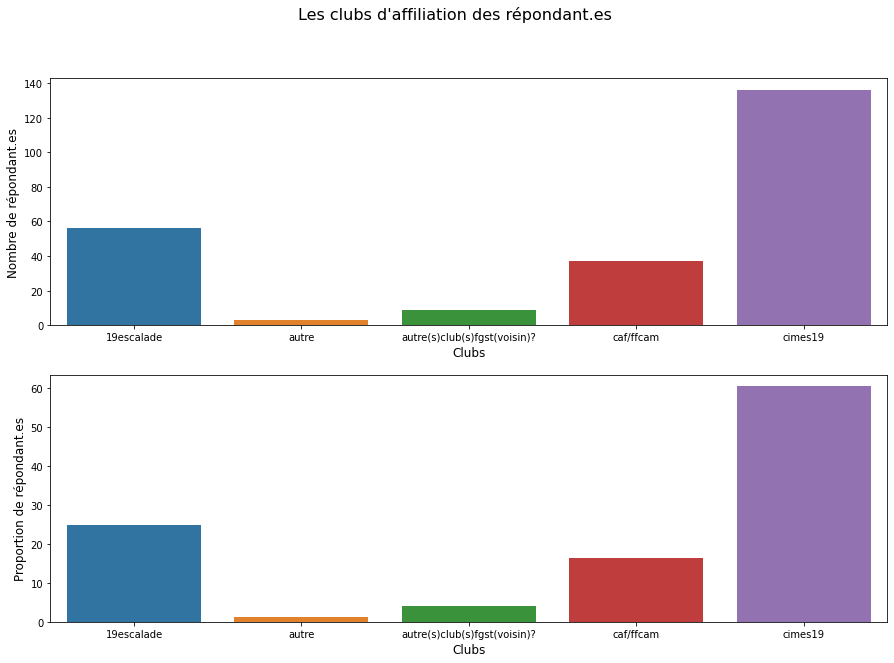

In [6]:
fig, axs = plt.subplots(2, figsize=(15, 10))

dtp1 = df1.groupby(["Clubs2"]).agg(nb =("id", "size")).reset_index()
dtp1["freq"] = dtp1["nb"]/ df1.id.nunique()*100

for n, col in enumerate(["nb", "freq"]):
    sns.barplot(x = 'Clubs2', y = col, data=dtp1, ax = axs[n])
    axs[n].set_xlabel("Clubs", fontsize = 12)
    if n == 0:
        axs[n].set_ylabel("Nombre de répondant.es", fontsize = 12)
    else:
        axs[n].set_ylabel("Proportion de répondant.es", fontsize = 12)


fig.suptitle("Les clubs d'affiliation des répondant.es", fontsize=16)


fig.show()